In [1]:
%matplotlib inline
# non-specific libraies
import matplotlib.pyplot as plt
import numpy as np

import keras
import keras.utils as utils
from keras import backend as K

Using TensorFlow backend.


# Load Dataset
---
- ### Dataset operations
    - data normalization
    - data reshaping
    - label gethering

In [2]:
# pre-defined mnist dataest
from keras.datasets import mnist

batch_size = 128
n_classes = 10 # 10 digits 0 to 9

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# training image dimentions 60000, 28, 28
n_sample, img_rows, img_cols = x_train.shape

# Reshape data
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

# float limiting for optimized memmory (for GPU usage) 
# basic gaming GPUs only works with 32 bit float and 32 bit int
x_train = x_train.astype("float32")
x_test = x_test.astype("float32")
# normalizing the input between [1 0]
x_train /= 255
x_test /= 255
print('x max:{} x min {}'.format(x_train.max(), x_train.min()))
print('train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

#convert class vectors to binary class matrices
Y_train = utils.to_categorical(y_train, n_classes)
Y_test = utils.to_categorical(y_test, n_classes)
print("label: {} ,One hot encoding: {}".format(y_train[0], Y_train[0, :]))

x max:1.0 x min 0.0
train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
label: 5 ,One hot encoding: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


## Mnist data example

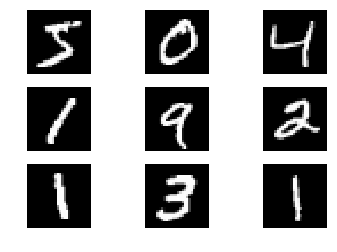

In [3]:
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(np.transpose(x_train[i], (2, 0, 1))[0], cmap='gray')
    plt.axis("off")

# Model Definition

In [4]:
# needed for model definition
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, GlobalMaxPooling2D

In [5]:
model = Sequential()

# Convolution2D(number_filters, row_size, column_size, input_shape=(number_channels, img_row, img_col))
model.add(Conv2D(16, kernel_size=(5, 5), input_shape=input_shape, padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(MaxPooling2D(pool_size=(2,2), padding='valid'))
model.add(Conv2D(16, kernel_size=(3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(MaxPooling2D(pool_size=(2,2), padding='valid'))
model.add(Conv2D(8, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(n_classes, activation='softmax'))

# Train

In [6]:
LR = 1e-3
opt = keras.optimizers.Adam(lr=LR)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'] )
model.summary()
utils.plot_model(model, to_file='images/conv_model.png')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 16)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 28, 28, 16)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 16)        2320      
_________________________________________________________________
activation_2 (Activation)    (None, 14, 14, 16)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 14, 14, 16)        0         
__________

### Printed model graph
------
![model graph](images/conv_model.png)

In [7]:
n_epoch = 3 # we can increase epoch
history = model.fit(x_train, Y_train, batch_size=batch_size, epochs=n_epoch, verbose=1, validation_split=0.2, shuffle=True)
score = model.evaluate(x_test, Y_test, verbose=1)
print ('Test score   : {:.6f}'.format(score[0]))
print ('Test accuracy: {:5.2f}%'.format(score[1] * 100))

Train on 48000 samples, validate on 12000 samples
Epoch 1/3
48000/48000 [==============================] - 120s 2ms/step - loss: 0.8284 - acc: 0.7228 - val_loss: 0.2112 - val_acc: 0.9633
Epoch 2/3
48000/48000 [==============================] - 119s 2ms/step - loss: 0.2882 - acc: 0.9084 - val_loss: 0.1276 - val_acc: 0.9747
Epoch 3/3
10000/10000 [==============================] - 11s 1ms/step
Test score   : 0.090095
Test accuracy: 98.07%


## Training History Visiualization

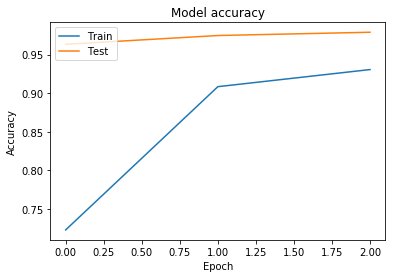

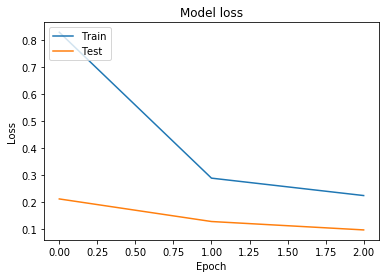

In [8]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## saving and loading weights

In [9]:
model.save_weights('weights/mnist_conv.h5')
print('model saved.')

model saved.


In [10]:
model.load_weights('weights/mnist_conv.h5')
score = model.evaluate(x_test, Y_test, verbose=1)
print ('Test score   : {:.6f}'.format(score[0]))
print ('Test accuracy: {:5.2f}%'.format(score[1] * 100))

10000/10000 [==============================] - 11s 1ms/step
Test score   : 0.090095
Test accuracy: 98.07%


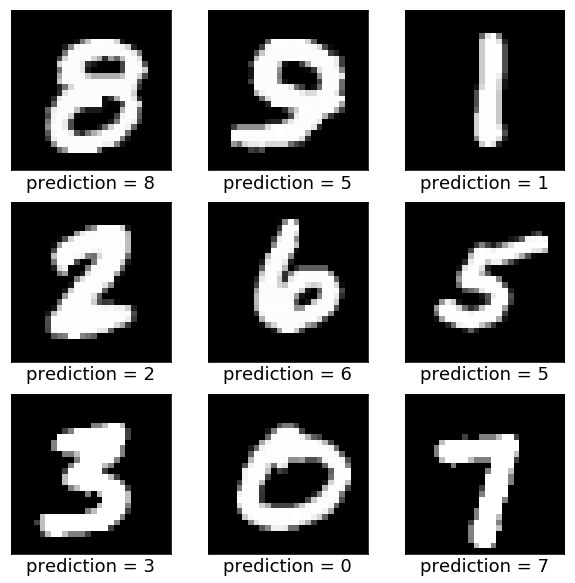

In [11]:
## Visualize sample result
radn_n = np.random.randint(x_test.shape[0] - 9)
res = model.predict_classes(x_test[radn_n:radn_n+9])
plt.figure(figsize=(10, 10))

for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(np.transpose(x_test[i+radn_n], (2, 0, 1))[0], 'gray')
    plt.gca().get_xaxis().set_ticks([])
    plt.gca().get_yaxis().set_ticks([])
    plt.xlabel("prediction = %d" % res[i], fontsize= 18)

## References
----
- [__Keras__][1]
- [The MNITS Database of handwritten digits][2]

[1]: https://keras.io/
[2]: http://yann.lecun.com/exdb/mnist/